In [1]:
import pyreadr
import pandas

In [2]:
df1 = pyreadr.read_r("ciliated_verified1_df.RData")


df1 = df1["ciliated_df"]

In [3]:
df2 = pyreadr.read_r("ciliated_df.RData")


df2 = df2["ciliated_df"]

In [4]:
df1

,orig.ident,nCount_RNA,nFeature_RNA,S.Score,G2M.Score,Phase,old.ident,CFS1_0,CFS1_1,CFS1_2
rownames,,,,,,,,,,
cell 1,SeuratProject,4851.0,2349,-0.043684,0.073609,G2M,SeuratProject,0.633880,0.787053,0.660230
cell 2,SeuratProject,13840.0,4632,0.071871,-0.096454,S,SeuratProject,0.572911,0.722795,0.611770
cell 3,SeuratProject,4257.0,2303,0.025867,-0.170702,S,SeuratProject,0.821017,1.030750,0.897647
cell 4,SeuratProject,10927.0,3971,0.229397,-0.017173,S,SeuratProject,0.754145,1.183659,0.879431
cell 5,SeuratProject,6742.0,3313,-0.152081,-0.016653,G1,SeuratProject,0.901340,1.501188,1.080250
...,...,...,...,...,...,...,...,...,...,...
cell 10371,SeuratProject,12161.0,4052,0.071738,0.131071,G2M,SeuratProject,0.344771,0.742417,0.447864
cell 10372,SeuratProject,9851.0,3520,0.201630,0.062142,S,SeuratProject,0.248853,0.311728,0.320983
cell 10373,SeuratProject,15555.0,4657,-0.129280,-0.209342,G1,SeuratProject,0.687687,0.671752,0.813926


In [5]:
import pandas as pd

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [7]:
df1['S.Score'] = df2['S.Score']
df1['G2M.Score'] = df2['G2M.Score']
df3 =  pd.DataFrame(df1)
df3["CFS1_0"] = df3["CFS1_0"].rank()/df1.shape[0]
df3["CFS1_1"] = df3["CFS1_1"].rank()/df1.shape[0]
df3["CFS1_2"] = df3["CFS1_2"].rank()/df1.shape[0]

In [9]:

df3 = df3.loc[df3['G2M.Score'] < 1]
df3 = df3.loc[df3['S.Score'] < 0]

In [10]:
df3

,orig.ident,nCount_RNA,nFeature_RNA,S.Score,G2M.Score,Phase,old.ident,CFS1_0,CFS1_1,CFS1_2
rownames,,,,,,,,,,
cell 5,SeuratProject,6742.0,3313,-0.249413,-0.272200,G1,SeuratProject,0.853687,0.995952,0.984482
cell 10,SeuratProject,6980.0,3028,-0.173810,-0.166248,G1,SeuratProject,0.490795,0.967711,0.908337
cell 14,SeuratProject,4629.0,2425,-0.008923,0.201405,G2M,SeuratProject,0.985735,0.722699,0.941687
cell 15,SeuratProject,3938.0,1983,-0.038065,-0.565984,G1,SeuratProject,0.665542,0.456241,0.725976
cell 17,SeuratProject,4638.0,2285,-0.197655,-0.426302,G1,SeuratProject,0.967325,0.979084,0.985446
...,...,...,...,...,...,...,...,...,...,...
cell 10343,SeuratProject,3113.0,1603,-0.374095,-1.051396,G1,SeuratProject,0.916241,0.794024,0.917976
cell 10347,SeuratProject,10222.0,3602,-0.039757,0.312777,G1,SeuratProject,0.102843,0.147952,0.045687
cell 10349,SeuratProject,10408.0,3639,-0.050696,-0.794727,G1,SeuratProject,0.726843,0.663614,0.839422


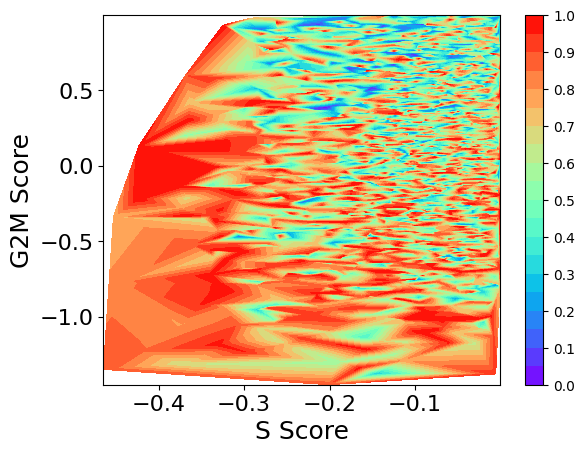

In [19]:



x = df3["S.Score"]
y = df3["G2M.Score"]
z = df3["CFS1_1"]


plt.tricontourf(x,y,z,cmap = plt.get_cmap("rainbow"),vmin=0., vmax=1.,levels = np.linspace(0,1,21))

plt.xlabel("S Score",fontsize = 18)
plt.ylabel("G2M Score",fontsize = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar(ticks=np.linspace(0, 1, 11))

plt.savefig('fig5_contourplot_oldmarkers.jpeg', format="jpeg", dpi=1200)
plt.show()



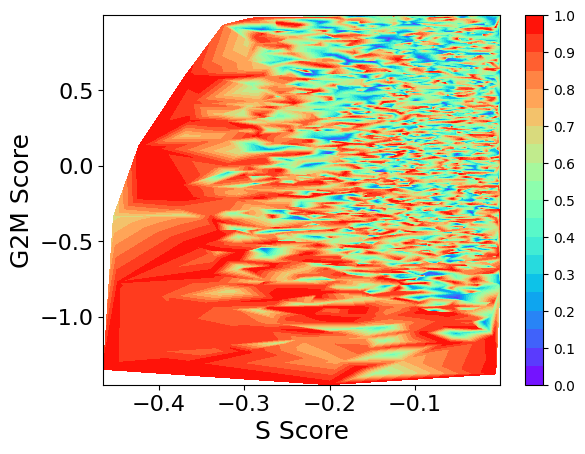

In [18]:
x = df3["S.Score"]
y = df3["G2M.Score"]
z = df3["CFS1_0"]


plt.tricontourf(x,y,z,cmap = plt.get_cmap("rainbow"),vmin=0., vmax=1.,levels = np.linspace(0,1,21))

plt.xlabel("S Score",fontsize = 18)
plt.ylabel("G2M Score",fontsize = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.colorbar(ticks=np.linspace(0, 1, 11))

#plt.savefig('fig5_contourplot_newmarkers.jpeg', format="jpeg", dpi=1200)
plt.show()

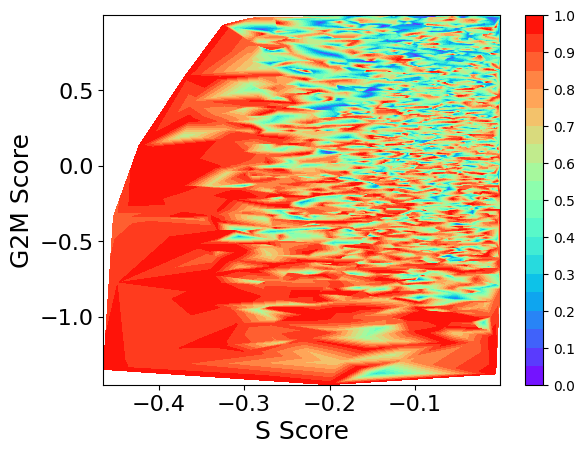

In [20]:
x = df3["S.Score"]
y = df3["G2M.Score"]
z = df3["CFS1_2"]


plt.tricontourf(x,y,z,cmap = plt.get_cmap("rainbow"),vmin=0., vmax=1.,levels = np.linspace(0,1,21))

plt.xlabel("S Score",fontsize = 18)
plt.ylabel("G2M Score",fontsize = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.colorbar(ticks=np.linspace(0, 1, 11))

plt.savefig('fig5_contourplot_oldandnewmarkers.jpeg', format="jpeg", dpi=1200)
plt.show()

In [34]:
df

,orig.ident,nCount_RNA,nFeature_RNA,S.Score,G2M.Score,Phase,old.ident,CFS2_0,CFS2_1,CFS2_2
rownames,,,,,,,,,,
cell 1,SeuratProject,4851.0,2349,-0.043684,0.073609,G2M,SeuratProject,0.144010,0.043601,0.085563
cell 2,SeuratProject,13840.0,4632,0.071871,-0.096454,S,SeuratProject,0.129463,0.467774,0.326390
cell 3,SeuratProject,4257.0,2303,0.025867,-0.170702,S,SeuratProject,0.160461,0.045432,0.093504
cell 4,SeuratProject,10927.0,3971,0.229397,-0.017173,S,SeuratProject,0.161890,0.387574,0.293258
cell 5,SeuratProject,6742.0,3313,-0.152081,-0.016653,G1,SeuratProject,0.167487,0.053230,0.100979
...,...,...,...,...,...,...,...,...,...,...
cell 10371,SeuratProject,12161.0,4052,0.071738,0.131071,G2M,SeuratProject,0.115360,0.559637,0.373969
cell 10372,SeuratProject,9851.0,3520,0.201630,0.062142,S,SeuratProject,0.108885,0.481646,0.325865
cell 10373,SeuratProject,15555.0,4657,-0.129280,-0.209342,G1,SeuratProject,0.202076,0.618669,0.444570


In [124]:
df1[['SenScore.New']].max()

SenScore.New    1.55137
dtype: float64